In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
data=pd.read_csv('D:/PythonFiles/Projects/UdemyProject/MusicInstramentsORIGINAL.csv')

In [3]:
data.shape

(681, 16)

In [4]:
data.head(3)

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Column1,Unnamed: 12,Is Paid,Total,Percent
0,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",https://www.udemy.com/nationalguitaracademy/,FALSE,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,NaN,NaN,Yes,634.0,93%
1,643970,Instant Harmonica - Christmas. Play Jingle Bel...,https://www.udemy.com/instant-harmonica-christ...,TRUE,20,823,11,10,All Levels,42 mins,2015-12-11T18:42:43Z,NaN,NaN,No,46.0,7%
2,801486,Playing Piano: Popular Pieces Vol. II,https://www.udemy.com/playing-piano-popular-pi...,TRUE,150,1472,4,24,Beginner Level,1.5 hours,2016-03-31T17:24:49Z,NaN,NaN,NaN,NaN,NaN


##### We can see that row 264 is shifted to the left for some columns ,Hence we have to deal with it manually

In [5]:
data.loc[264,:]

id                                                                  96698
title                   Learn Classical Guitar Technique and play 'Spa...
url                                                                 000!"
isPaid                        https://www.udemy.com/learnguitartoworship/
price                                                                TRUE
numSubscribers                                                         30
numReviews                                                           1463
numPublishedLectures                                                   29
instructionalLevel                                                     52
contentInfo                                                Beginner Level
publishedTime                                                     3 hours
Column1                                              2014-08-24T01:53:11Z
Unnamed: 12                                                           NaN
Is Paid                               

In [6]:
df_info_gist=data.loc[0:1,['Is Paid','Total','Column1']]
df_info_gist

,Is Paid,Total,Column1
0,Yes,634.0,NaN
1,No,46.0,NaN


In [7]:
df=data.copy()

##### Fixing the column 264 as mentioned above

In [8]:
df.loc[264,['url','isPaid']]=df.loc[264,['isPaid','url']].values
df.loc[264,['isPaid','price']]=df.loc[264,['price','isPaid']].values
df.loc[264,['price','numSubscribers']]=df.loc[264,['numSubscribers','price']].values
df.loc[264,['numSubscribers','numReviews']]=df.loc[264,['numReviews','numSubscribers']].values
df.loc[264,['numReviews','numPublishedLectures']]=df.loc[264,['numPublishedLectures','numReviews']].values
df.loc[264,['numPublishedLectures','instructionalLevel']]=df.loc[264,['instructionalLevel','numPublishedLectures']].values
df.loc[264,['instructionalLevel','contentInfo']]=df.loc[264,['contentInfo','instructionalLevel']].values
df.loc[264,['contentInfo','publishedTime']]=df.loc[264,['publishedTime','contentInfo']].values
df.loc[264,['publishedTime','Column1']]=df.loc[264,['Column1','publishedTime']].values

In [9]:
df.shape

(681, 16)

In [10]:
# Now the row is fixed
df.loc[264,:]

id                                                                  96698
title                   Learn Classical Guitar Technique and play 'Spa...
url                           https://www.udemy.com/learnguitartoworship/
isPaid                                                               TRUE
price                                                                  30
numSubscribers                                                       1463
numReviews                                                             29
numPublishedLectures                                                   52
instructionalLevel                                         Beginner Level
contentInfo                                                       3 hours
publishedTime                                        2014-08-24T01:53:11Z
Column1                                                             000!"
Unnamed: 12                                                           NaN
Is Paid                               

##### Dropping the 'Is Paid' Column as it might lead to overfitting as it indirectly gives away the price of the course if its a free course.

In [11]:
df.drop(['Is Paid','Total','Column1'],axis=1,inplace=True)

In [12]:
df.shape

(681, 13)

In [13]:
df.head(3)

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Unnamed: 12,Percent
0,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",https://www.udemy.com/nationalguitaracademy/,FALSE,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,NaN,93%
1,643970,Instant Harmonica - Christmas. Play Jingle Bel...,https://www.udemy.com/instant-harmonica-christ...,TRUE,20,823,11,10,All Levels,42 mins,2015-12-11T18:42:43Z,NaN,7%
2,801486,Playing Piano: Popular Pieces Vol. II,https://www.udemy.com/playing-piano-popular-pi...,TRUE,150,1472,4,24,Beginner Level,1.5 hours,2016-03-31T17:24:49Z,NaN,NaN


In [14]:
df['Unnamed: 12'].isnull().sum()

681

In [15]:
df.drop(['Unnamed: 12','url'],axis=1,inplace=True)

In [16]:
df.shape

(681, 11)

In [17]:
df.head()

,id,title,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Percent
0,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",FALSE,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,93%
1,643970,Instant Harmonica - Christmas. Play Jingle Bel...,TRUE,20,823,11,10,All Levels,42 mins,2015-12-11T18:42:43Z,7%
2,801486,Playing Piano: Popular Pieces Vol. II,TRUE,150,1472,4,24,Beginner Level,1.5 hours,2016-03-31T17:24:49Z,NaN
3,455054,Ninja Chord Changes - Master your guitar chord...,TRUE,30,1327,11,13,Beginner Level,1.5 hours,2015-03-29T21:57:12Z,NaN
4,1257976,Your First 10 Guitar Lessons - Learn how to pl...,FALSE,Free,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    681 non-null    int64 
 1   title                 681 non-null    object
 2   isPaid                681 non-null    object
 3   price                 681 non-null    object
 4   numSubscribers        681 non-null    object
 5   numReviews            681 non-null    object
 6   numPublishedLectures  681 non-null    object
 7   instructionalLevel    681 non-null    object
 8   contentInfo           681 non-null    object
 9   publishedTime         681 non-null    object
 10  Percent               2 non-null      object
dtypes: int64(1), object(10)
memory usage: 58.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D98FDF610>]],
      dtype=object)

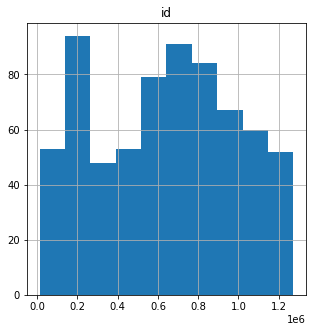

In [19]:
df.hist(bins=10,figsize=(5,5))

In [20]:
#Separating Date and time
df_date_time=df.publishedTime.apply(lambda x:pd.Series(str(x).split('T')))
df_date_time=df_date_time.rename(columns={0:'Date',1:'Time'})
df_date_time.head()

,Date,Time
0,2015-12-21,18:50:50Z
1,2015-12-11,18:42:43Z
2,2016-03-31,17:24:49Z
3,2015-03-29,21:57:12Z
4,2017-06-29,00:29:36Z


In [21]:
df_date_time['Time'].isnull().sum()

0

In [22]:
df_date_time.loc[264]

Date    2014-08-24
Time     01:53:11Z
Name: 264, dtype: object

##### Removing Z from the Time column

In [23]:
import re
for i in range(len(df_date_time)):
    df_date_time['Time'][i]=re.sub("[*Z]","",df_date_time['Time'][i])

In [24]:
df_date_time.head()

,Date,Time
0,2015-12-21,18:50:50
1,2015-12-11,18:42:43
2,2016-03-31,17:24:49
3,2015-03-29,21:57:12
4,2017-06-29,00:29:36


In [25]:
df=df.merge(df_date_time,left_index=True, right_index=True)

In [26]:
df.head()

,id,title,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Percent,Date,Time
0,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",FALSE,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,93%,2015-12-21,18:50:50
1,643970,Instant Harmonica - Christmas. Play Jingle Bel...,TRUE,20,823,11,10,All Levels,42 mins,2015-12-11T18:42:43Z,7%,2015-12-11,18:42:43
2,801486,Playing Piano: Popular Pieces Vol. II,TRUE,150,1472,4,24,Beginner Level,1.5 hours,2016-03-31T17:24:49Z,NaN,2016-03-31,17:24:49
3,455054,Ninja Chord Changes - Master your guitar chord...,TRUE,30,1327,11,13,Beginner Level,1.5 hours,2015-03-29T21:57:12Z,NaN,2015-03-29,21:57:12
4,1257976,Your First 10 Guitar Lessons - Learn how to pl...,FALSE,Free,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z,NaN,2017-06-29,00:29:36


In [27]:
df.drop('publishedTime',axis=1,inplace=True)

In [28]:
df.shape

(681, 12)

In [29]:
df.loc[262:266]

,id,title,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,Percent,Date,Time
262,823860,Trumpet Pro Series - You're going to love prac...,TRUE,50,92,1,25,All Levels,6 hours,NaN,2016-04-22,23:43:37
263,635570,A Guide to Analog Synths: For the modern EDM e...,TRUE,20,29,4,37,All Levels,3.5 hours,NaN,2016-04-20,23:05:39
264,96698,Learn Classical Guitar Technique and play 'Spa...,TRUE,30,1463,29,52,Beginner Level,3 hours,NaN,2014-08-24,01:53:11
265,99324,Acoustic Blues Guitar Lessons,FALSE,Free,8217,109,10,Intermediate Level,1 hour,NaN,2013-09-30,20:45:20
266,535650,Accelerate Your Guitar Learning With Metal Tec...,TRUE,20,1305,25,68,All Levels,6.5 hours,NaN,2015-08-18,20:00:20


In [30]:
df['instructionalLevel'].value_counts()

Beginner Level        297
All Levels            276
Intermediate Level    101
Expert Level            7
Name: instructionalLevel, dtype: int64

##### Converting difficulty levels into numerical data in the following way  :
* All Levels - 0
* Begineer Level - 1
* Intermediate Level - 2
* Expert Level - 3 

In [31]:
insbin={'All Levels': 0,'Beginner Level': 1,'Intermediate Level': 2,'Expert Level': 3}
df['instructionalLevel']=df['instructionalLevel'].map(insbin)
df['instructionalLevel']


0      1
1      0
2      1
3      1
4      1
      ..
676    1
677    0
678    1
679    0
680    0
Name: instructionalLevel, Length: 681, dtype: int64

##### Replacing 'Free' in price column with 0

In [32]:


df['price']=np.where(df['price']=='Free',0,df['price'])

df['price']

0        0
1       20
2      150
3       30
4        0
      ... 
676     20
677     50
678     20
679     50
680     20
Name: price, Length: 681, dtype: object

##### Search For Catchy Words

In [33]:

df['CatchyWords']=0
CatchyWordPresence=0
for i in range(0,len(df['title'])):
    for j in df['title'][i].split():
        if(j=='Easy' or j=='easy' or j=='Within' or j=='within' or j=='Basics' or j=='basics' or j=='Crash' or j=='crash' or j=='Become' or j=='become' or j=='instant' or j=='Instant' ):
           CatchyWordPresence=CatchyWordPresence+1
    if CatchyWordPresence >0:
        df['CatchyWords'][i]=1
    else:
        df['CatchyWords'][i]=0
df['CatchyWords'].value_counts()

<ipython-input-33-f41f68ce08d1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CatchyWords'][i]=0
<ipython-input-33-f41f68ce08d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CatchyWords'][i]=1


1    680
0      1
Name: CatchyWords, dtype: int64

In [34]:
df

,id,title,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,Percent,Date,Time,CatchyWords
0,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",FALSE,0,4529,193,7,1,36 mins,93%,2015-12-21,18:50:50,0
1,643970,Instant Harmonica - Christmas. Play Jingle Bel...,TRUE,20,823,11,10,0,42 mins,7%,2015-12-11,18:42:43,1
2,801486,Playing Piano: Popular Pieces Vol. II,TRUE,150,1472,4,24,1,1.5 hours,NaN,2016-03-31,17:24:49,1
3,455054,Ninja Chord Changes - Master your guitar chord...,TRUE,30,1327,11,13,1,1.5 hours,NaN,2015-03-29,21:57:12,1
4,1257976,Your First 10 Guitar Lessons - Learn how to pl...,FALSE,0,924,4,18,1,1 hour,NaN,2017-06-29,00:29:36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,513528,Curso de guitarra para principiantes.,TRUE,20,4,0,7,1,1 hour,NaN,2015-06-11,15:55:19,1
677,211026,Aprende a tocar Jazz y Ritmos Latinos en la gu...,TRUE,50,6,0,17,0,3 hours,NaN,2014-05-07,22:15:04,1
678,847808,こどもギターレッスン リトルギタリストⅢ（完結編）,TRUE,20,3,0,36,1,1 hour,NaN,2016-10-03,16:42:12,1
679,218856,Aprende a tocar la flauta dulce de forma senci...,TRUE,50,5,0,23,0,3 hours,NaN,2014-05-19,16:49:04,1


In [35]:
df.drop(['Percent'],axis=1,inplace=True)

In [36]:
df

,id,title,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,Date,Time,CatchyWords
0,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",FALSE,0,4529,193,7,1,36 mins,2015-12-21,18:50:50,0
1,643970,Instant Harmonica - Christmas. Play Jingle Bel...,TRUE,20,823,11,10,0,42 mins,2015-12-11,18:42:43,1
2,801486,Playing Piano: Popular Pieces Vol. II,TRUE,150,1472,4,24,1,1.5 hours,2016-03-31,17:24:49,1
3,455054,Ninja Chord Changes - Master your guitar chord...,TRUE,30,1327,11,13,1,1.5 hours,2015-03-29,21:57:12,1
4,1257976,Your First 10 Guitar Lessons - Learn how to pl...,FALSE,0,924,4,18,1,1 hour,2017-06-29,00:29:36,1
...,...,...,...,...,...,...,...,...,...,...,...,...
676,513528,Curso de guitarra para principiantes.,TRUE,20,4,0,7,1,1 hour,2015-06-11,15:55:19,1
677,211026,Aprende a tocar Jazz y Ritmos Latinos en la gu...,TRUE,50,6,0,17,0,3 hours,2014-05-07,22:15:04,1
678,847808,こどもギターレッスン リトルギタリストⅢ（完結編）,TRUE,20,3,0,36,1,1 hour,2016-10-03,16:42:12,1
679,218856,Aprende a tocar la flauta dulce de forma senci...,TRUE,50,5,0,23,0,3 hours,2014-05-19,16:49:04,1


In [37]:
df['contentInfo'].value_counts()

1.5 hours     124
1 hour        122
2 hours        79
3 hours        58
2.5 hours      53
3.5 hours      31
4 hours        30
4.5 hours      19
5 hours        15
5.5 hours      13
6 hours        13
7 hours        10
37 mins         7
32 mins         7
44 mins         7
7.5 hours       7
30 mins         6
40 mins         6
38 mins         6
33 mins         5
8 hours         5
6.5 hours       5
10.5 hours      4
42 mins         4
31 mins         4
36 mins         4
35 mins         4
11.5 hours      3
43 mins         3
39 mins         3
34 mins         3
8.5 hours       3
9 hours         2
41 mins         2
9.5 hours       2
31 hours        1
34 hours        1
14 hours        1
30 hours        1
28.5 hours      1
15.5 hours      1
10 hours        1
18.5 hours      1
29 mins         1
23 hours        1
12.5 hours      1
38 hours        1
Name: contentInfo, dtype: int64

In [38]:
df['duration']=0
for i in range(0,len(df['contentInfo'])):
    if 'hours' in df['contentInfo'][i].split()[1]:
        df['duration'][i]=df['contentInfo'][i].split()[0]

    if 'mins' in df['contentInfo'][i].split()[1]:
        df['duration'][i]=df['contentInfo'][i].split()[0]
        
        
df['contentInfo']

<ipython-input-38-d6c3e2525e22>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=df['contentInfo'][i].split()[0]
<ipython-input-38-d6c3e2525e22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=df['contentInfo'][i].split()[0]
D:\Softwares\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        36 mins
1        42 mins
2      1.5 hours
3      1.5 hours
4         1 hour
         ...    
676       1 hour
677      3 hours
678       1 hour
679      3 hours
680      3 hours
Name: contentInfo, Length: 681, dtype: object

In [39]:
for i in range(0,len(df['duration'])):
    if df['duration'][i]==0:
        df['duration'][i]=1        

<ipython-input-39-821f4d135454>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=1


##### Converting minutes into hours

In [40]:

for i in range(0,len(df['duration'])):
    if 'mins' in df['contentInfo'][i].split()[1]:
        df['duration'][i]=float(df['contentInfo'][i].split()[0])/60

<ipython-input-40-1760ea6d6181>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][i]=float(df['contentInfo'][i].split()[0])/60


In [41]:
df['duration'].value_counts()

1.5                    124
1                      122
2                       79
3                       58
2.5                     53
3.5                     31
4                       30
4.5                     19
5                       15
6                       13
5.5                     13
7                       10
0.5333333333333333       7
0.7333333333333333       7
0.6166666666666667       7
7.5                      7
0.5                      6
0.6333333333333333       6
0.6666666666666666       6
0.55                     5
8                        5
6.5                      5
0.5166666666666667       4
0.7                      4
0.5833333333333334       4
0.6                      4
10.5                     4
8.5                      3
0.5666666666666667       3
0.7166666666666667       3
0.65                     3
11.5                     3
9                        2
0.6833333333333333       2
9.5                      2
18.5                     1
28.5                     1
1

In [42]:
df.head()

,id,title,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,Date,Time,CatchyWords,duration
0,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",FALSE,0,4529,193,7,1,36 mins,2015-12-21,18:50:50,0,0.6
1,643970,Instant Harmonica - Christmas. Play Jingle Bel...,TRUE,20,823,11,10,0,42 mins,2015-12-11,18:42:43,1,0.7
2,801486,Playing Piano: Popular Pieces Vol. II,TRUE,150,1472,4,24,1,1.5 hours,2016-03-31,17:24:49,1,1.5
3,455054,Ninja Chord Changes - Master your guitar chord...,TRUE,30,1327,11,13,1,1.5 hours,2015-03-29,21:57:12,1,1.5
4,1257976,Your First 10 Guitar Lessons - Learn how to pl...,FALSE,0,924,4,18,1,1 hour,2017-06-29,00:29:36,1,1


In [43]:
#df.to_csv('data1.csv',index=False)